<a href="https://colab.research.google.com/github/ROHAN010501/ML_Projects/blob/main/Stroke_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Stroke Prediction Using Machine Learning**



# **Problem Statement -**

Stroke is the second leading cause of death globally, accounting for approximately 11% of total deaths according to the World Health Organization (WHO). Early prediction and diagnosis of stroke are critical for effective prevention and treatment. This project aims to develop a machine learning model to predict the likelihood of a patient suffering a stroke based on various health parameters such as gender, age, existing diseases, and smoking status. By leveraging this model, healthcare providers can identify high-risk patients and implement timely interventions to reduce the incidence of stroke and associated mortality

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

### Dataset Loading

In [2]:
# Load Dataset

df0 = pd.read_csv('https://github.com/ROHAN010501/data/raw/main/healthcare-dataset-stroke-data.csv')

### Dataset First View

In [3]:
# Dataset First Look
df = df0.copy()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count

df.shape

(5110, 12)

### Dataset Information

In [5]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count

df.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count

df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: >

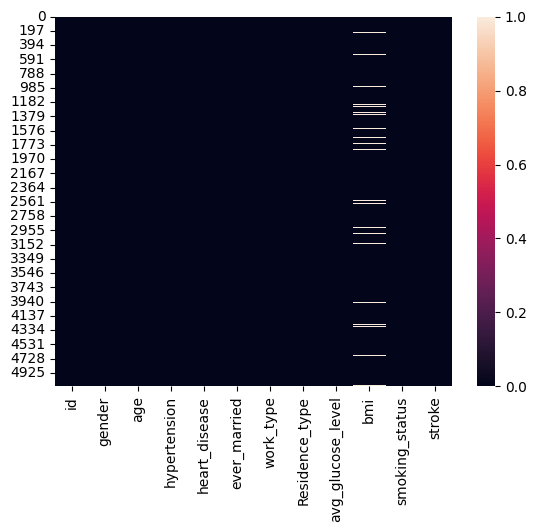

In [8]:
# Visualizing the missing values

sns.heatmap(df.isnull())

In [9]:
# Dataset Columns

df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
# Dataset Describe

df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Variables Description

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.

df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

# creating a numerical dataframe

numerical_df = df.select_dtypes(include=np.number)
numerical_df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1


In [13]:
# creating a categorical dataframe

categorical_df = df.select_dtypes(include=object)
categorical_df.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


### Age histplot

    age  count
0  78.0    102
1  57.0     95
2  52.0     90
3  54.0     87
4  51.0     86


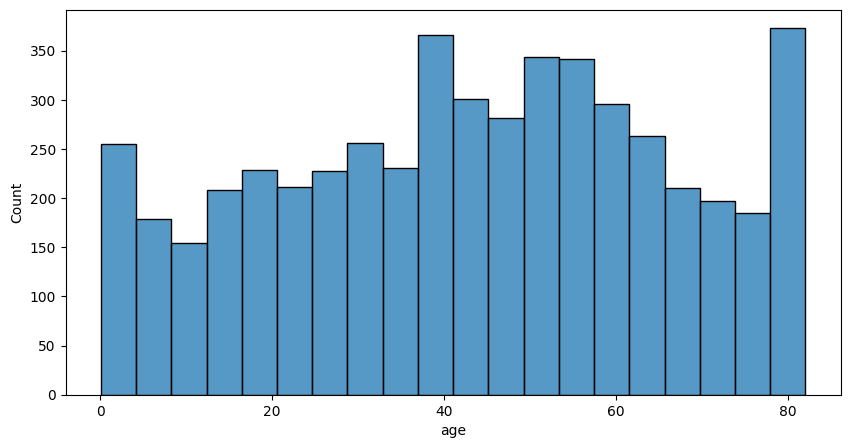

In [14]:
print(df['age'].value_counts().reset_index().head())

# the histplot is used to understand the distribution of contionus variable
plt.figure(figsize=(10,5))
sns.histplot(x='age',data=df)
plt.show()


###hypertension pie

   hypertension  count
0             0   4612
1             1    498


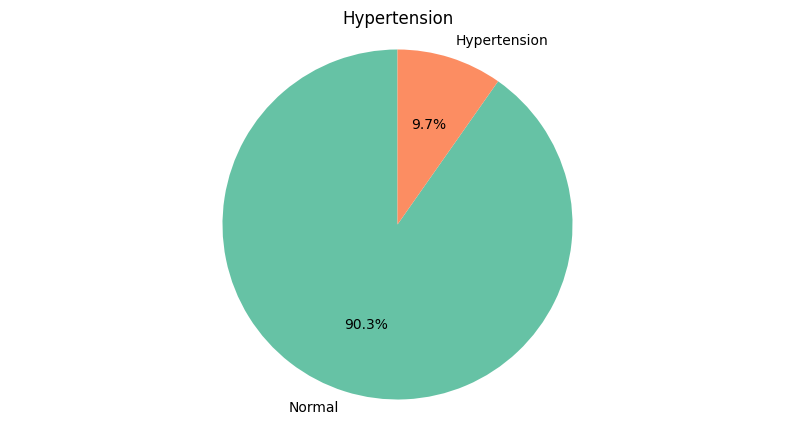

In [15]:

print(df['hypertension'].value_counts().reset_index())

# the pie chart is used to visualize the distribution of whole

plt.figure(figsize=(10, 5))
plt.title('Hypertension')
plt.pie(df['hypertension'].value_counts(), startangle=90, labels=['Normal', 'Hypertension'], autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.axis('equal')
plt.show()


###  heart_disease pie

   heart_disease  count
0              0   4834
1              1    276


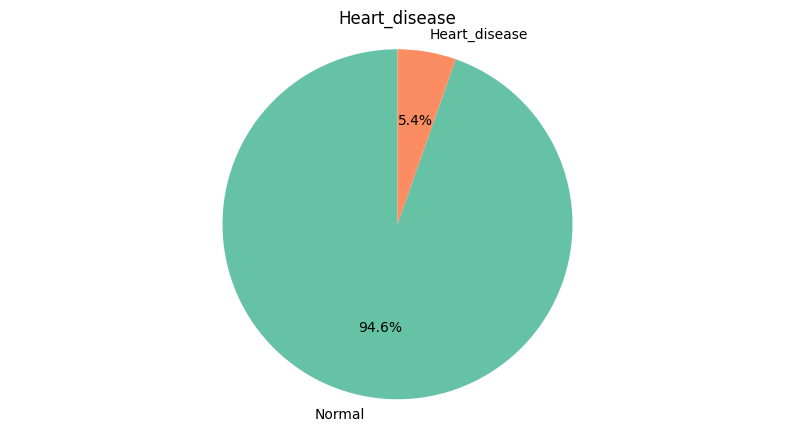

In [16]:
print(df['heart_disease'].value_counts().reset_index())

# the pie chart is used to visualize the distribution of whole
plt.figure(figsize=(10, 5))
plt.title('Heart_disease')
plt.pie(df['heart_disease'].value_counts(), startangle=90, labels=['Normal','Heart_disease'], autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.axis('equal')
plt.show()

###  avg_glucose_level Histogram

      avg_glucose_level  count
0                 93.88      6
1                 91.68      5
2                 91.85      5
3                 83.16      5
4                 73.00      5
...                 ...    ...
3974             111.93      1
3975              94.40      1
3976              95.57      1
3977              66.29      1
3978              85.28      1

[3979 rows x 2 columns]


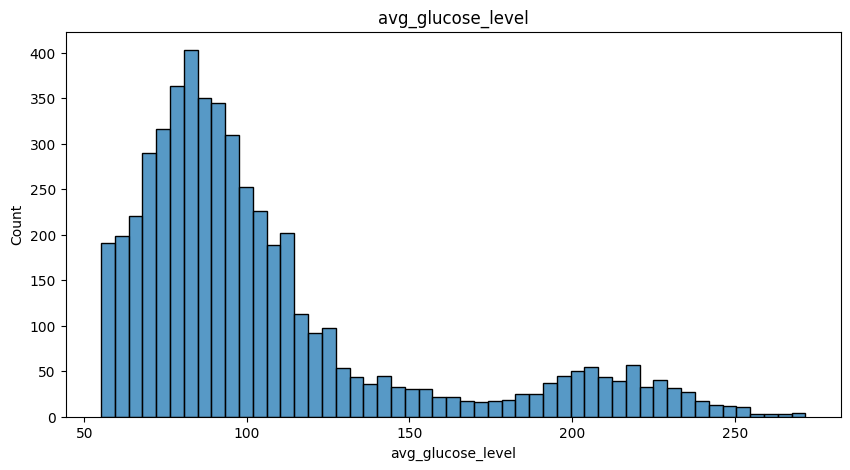

In [17]:

print(df['avg_glucose_level'].value_counts().reset_index())

# the pie chart is used to visualize the distribution of whole
plt.figure(figsize=(10, 5))
sns.histplot(x='avg_glucose_level',data=df)
plt.title('avg_glucose_level')
plt.show()

###bmi histplot (Univariate)

      bmi  count
0    28.7     41
1    28.4     38
2    26.7     37
3    27.6     37
4    26.1     37
..    ...    ...
413  48.7      1
414  49.2      1
415  51.0      1
416  49.4      1
417  14.9      1

[418 rows x 2 columns]


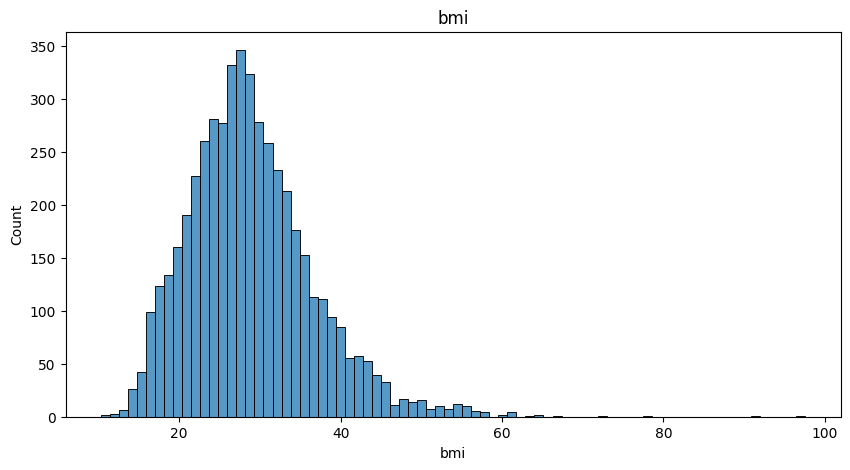

In [18]:

print(df['bmi'].value_counts().reset_index())

# the histplot is used to understand the distribution of contionus variable
plt.figure(figsize=(10,5))
plt.title('bmi')
sns.histplot(x='bmi',data=df)
plt.show()

###stroke pie


   stroke  count
0       0   4861
1       1    249


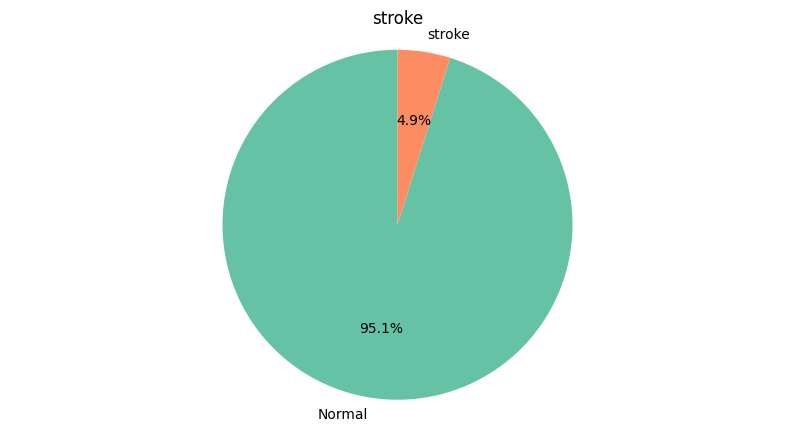

In [19]:

print(df['stroke'].value_counts().reset_index())

# the pie plot is used to show to distribution of all
plt.figure(figsize=(10,5))
plt.title('stroke')
plt.pie(df['stroke'].value_counts(), startangle=90, labels=['Normal','stroke'], autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.axis('equal')
plt.show()


Here the dependent variable/target variable is heavily imbalanced so we need to balance the dataset using oversampling techniques.









###gender pie

   gender  count
0  Female   2994
1    Male   2115
2   Other      1


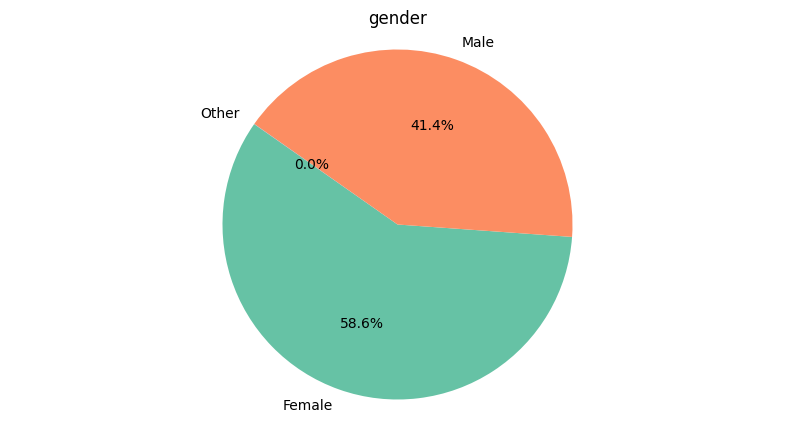

In [20]:

print(df['gender'].value_counts().reset_index())

# the pie chart is used to visualize the distribution of whole
plt.figure(figsize=(10, 5))
plt.title('gender')
plt.pie(df['gender'].value_counts(), startangle=145, labels=['Female','Male','Other'], autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.axis('equal')
plt.show()

###ever_married pie


  ever_married  count
0          Yes   3353
1           No   1757


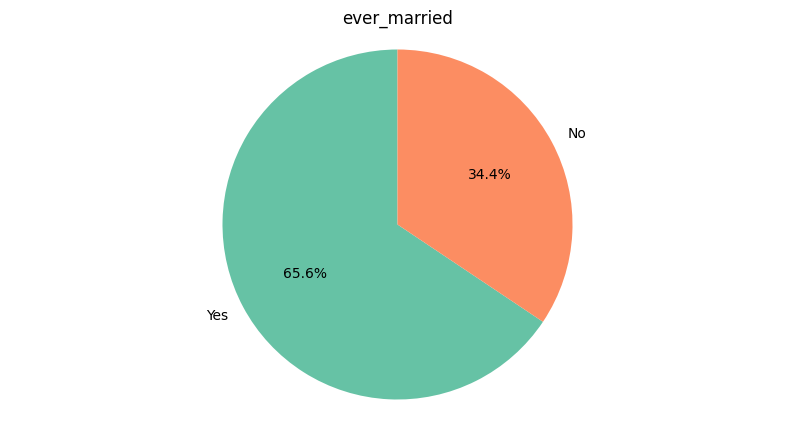

In [21]:

print(df['ever_married'].value_counts().reset_index().head())

# the pie plot is used top visualised to show the distribution of whole
plt.figure(figsize=(10,5))
plt.title('ever_married')
plt.pie(df['ever_married'].value_counts(), startangle=90, labels=['Yes', 'No'], autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.axis('equal')
plt.show()

###work_type barplot

       work_type  count
0        Private   2925
1  Self-employed    819
2       children    687
3       Govt_job    657
4   Never_worked     22


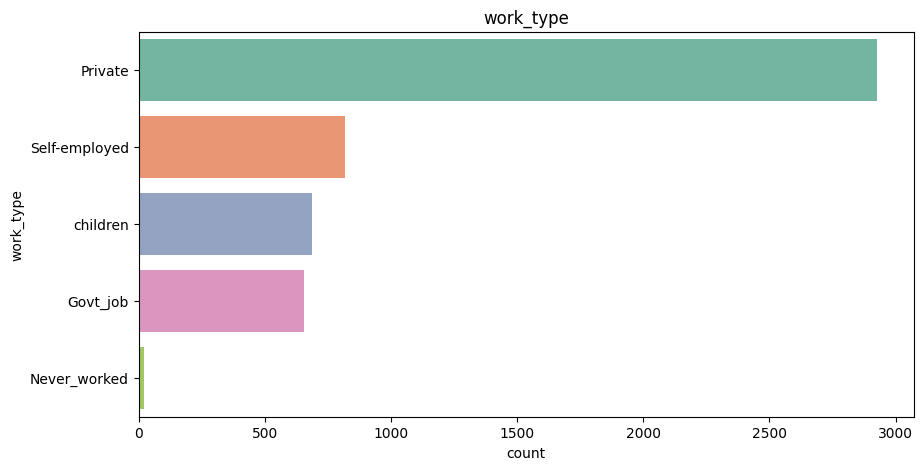

In [22]:

work_type = df['work_type'].value_counts().reset_index()
print(work_type)

# the barplot is used to visualize the distribution of categorical variable
plt.figure(figsize=(10,5))
plt.title('work_type')
sns.barplot(y='work_type',x='count',data=work_type, palette='Set2')
plt.show()

###Residence_type pie

  Residence_type  count
0          Urban   2596
1          Rural   2514


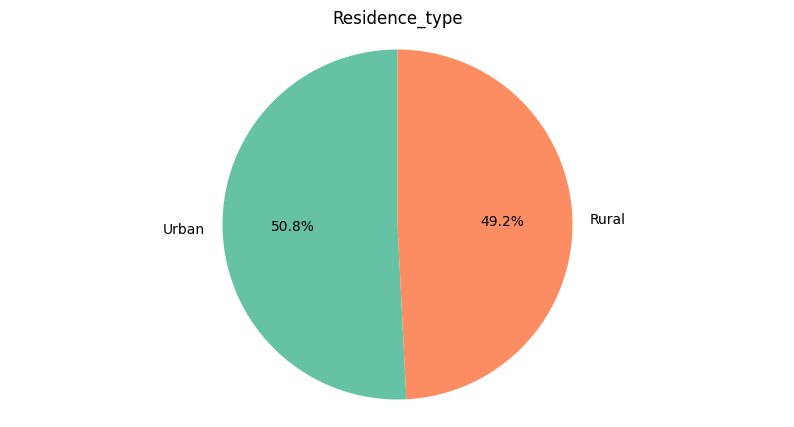

In [23]:

Residence_type = df['Residence_type'].value_counts().reset_index()
print(Residence_type)

plt.figure(figsize=(10,5))
plt.title('Residence_type')
plt.pie(df['Residence_type'].value_counts(), startangle=90, labels=['Urban','Rural'], autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.axis('equal')
plt.show()

###smoking_status Barplot

    smoking_status  count
0     never smoked   1892
1          Unknown   1544
2  formerly smoked    885
3           smokes    789


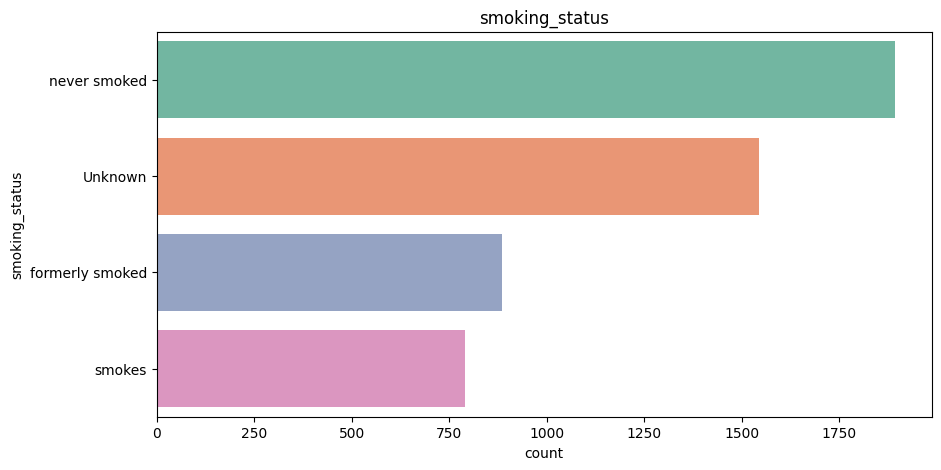

In [24]:

smoking_status = df['smoking_status'].value_counts().reset_index()
print(smoking_status)

# the barplot is used to visualize the distribution of categorical variable
plt.figure(figsize=(10,5))
plt.title('smoking_status')
sns.barplot(y='smoking_status',x='count',data=smoking_status, palette='Set2')
plt.show()

### Correlation Heatmap

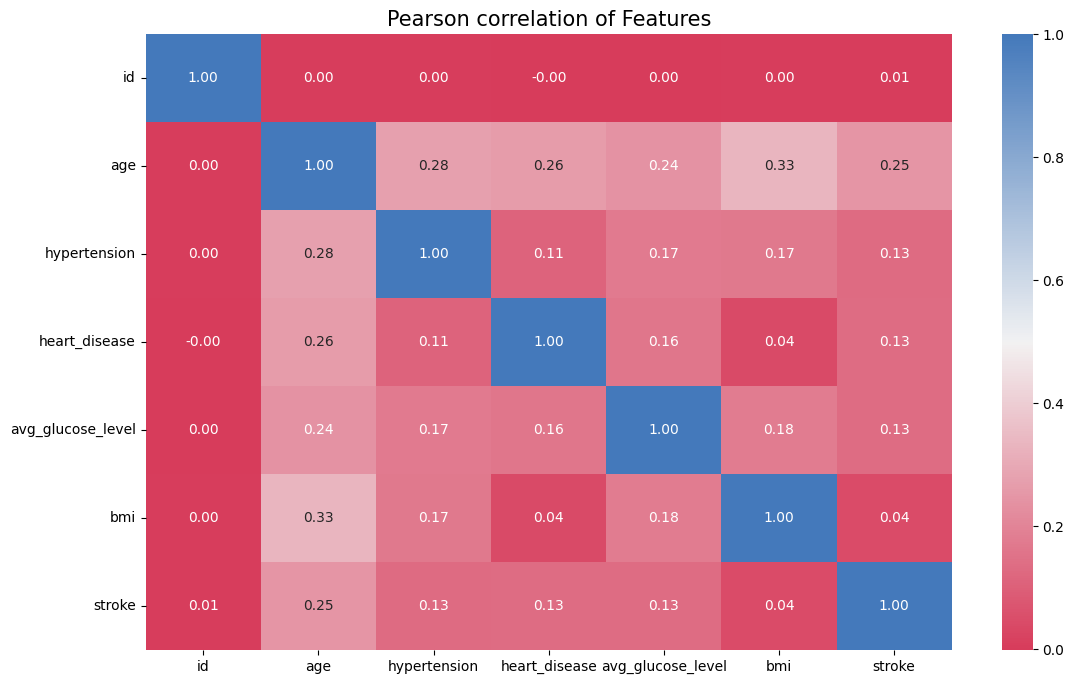

In [25]:
# Correlation Heatmap visualization code

 # plotting correalation heatmap
corr = numerical_df.corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)
plt.figure(figsize=(13, 8))
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f")
plt.title('Pearson correlation of Features',fontsize=15)
plt.show()


### ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [26]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [27]:
#filling null values
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

### 2. Handling Outliers

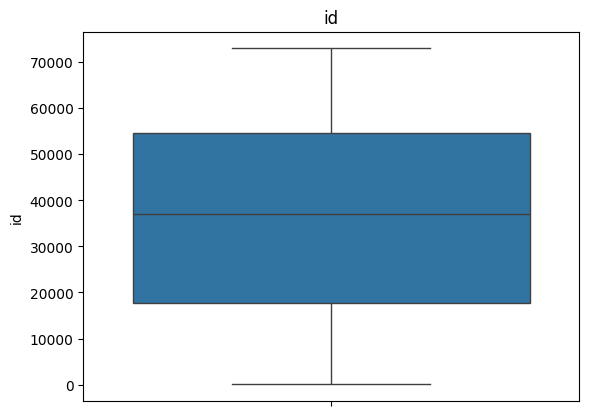

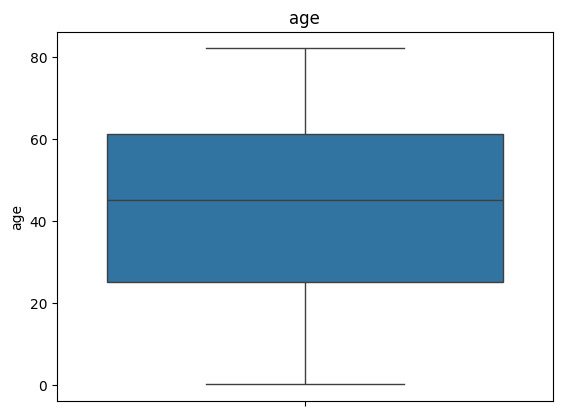

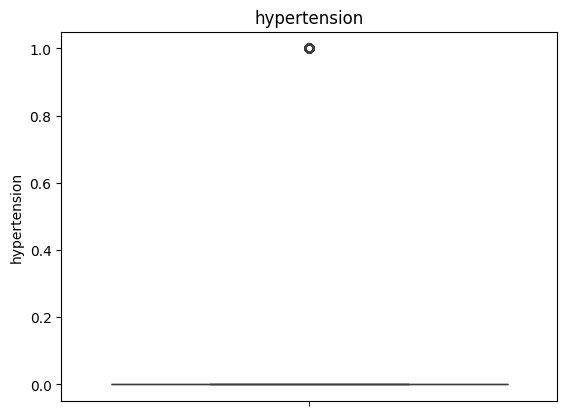

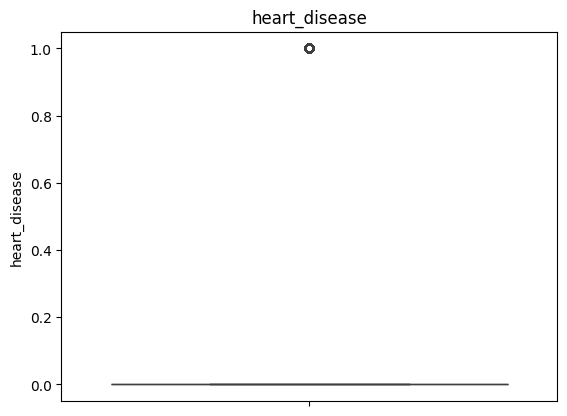

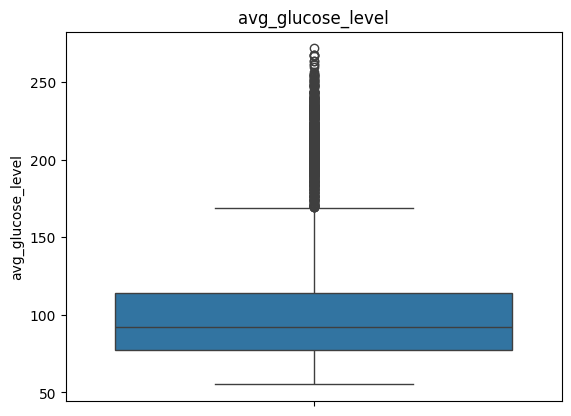

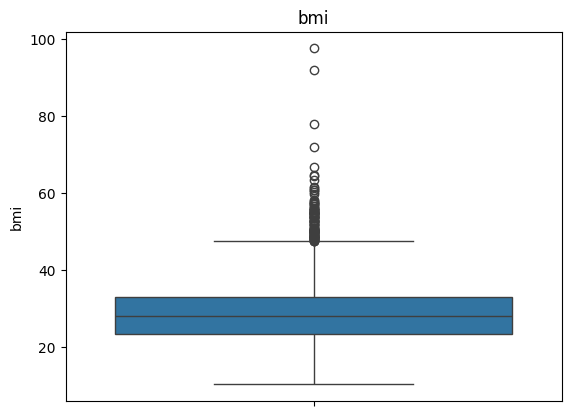

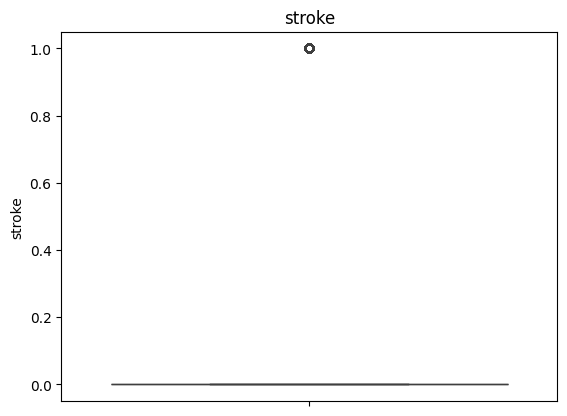

In [28]:
# Handling Outliers & Outlier treatments

# using boxplot to check for outliers

for col in numerical_df.columns:
    sns.boxplot(numerical_df[col])
    plt.title(col)
    plt.show()

In [29]:
# here can be some outliers but we can't remove as they have important information and some outlier can be
# possible but we can remove some higher values

#we are droping rows where BMI > 70
df.drop(df[df['bmi'] > 70].index, inplace=True)


### 3. Categorical Encoding

In [30]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5106 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5106 non-null   int64  
 1   gender             5106 non-null   object 
 2   age                5106 non-null   float64
 3   hypertension       5106 non-null   int64  
 4   heart_disease      5106 non-null   int64  
 5   ever_married       5106 non-null   object 
 6   work_type          5106 non-null   object 
 7   Residence_type     5106 non-null   object 
 8   avg_glucose_level  5106 non-null   float64
 9   bmi                5106 non-null   float64
 10  smoking_status     5106 non-null   object 
 11  stroke             5106 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.6+ KB


In [32]:
#encoding categorical variables

df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])


In [33]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,False,True,False,...,False,True,False,False,False,True,False,True,False,False
1,51676,61.0,0,0,202.21,28.893237,1,True,False,False,...,False,False,True,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.500000,1,False,True,False,...,False,True,False,False,True,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.400000,1,True,False,False,...,False,True,False,False,False,True,False,False,False,True
4,1665,79.0,1,0,174.12,24.000000,1,True,False,False,...,False,False,True,False,True,False,False,False,True,False


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [34]:
# Manipulate Features to minimize feature correlation and create new features

#Contain all independent variables
x = df.drop(['stroke'], axis=1)

#Contain Dependent variable
y = df['stroke']

In [35]:
x.shape

(5106, 22)

#### 2. Feature Selection

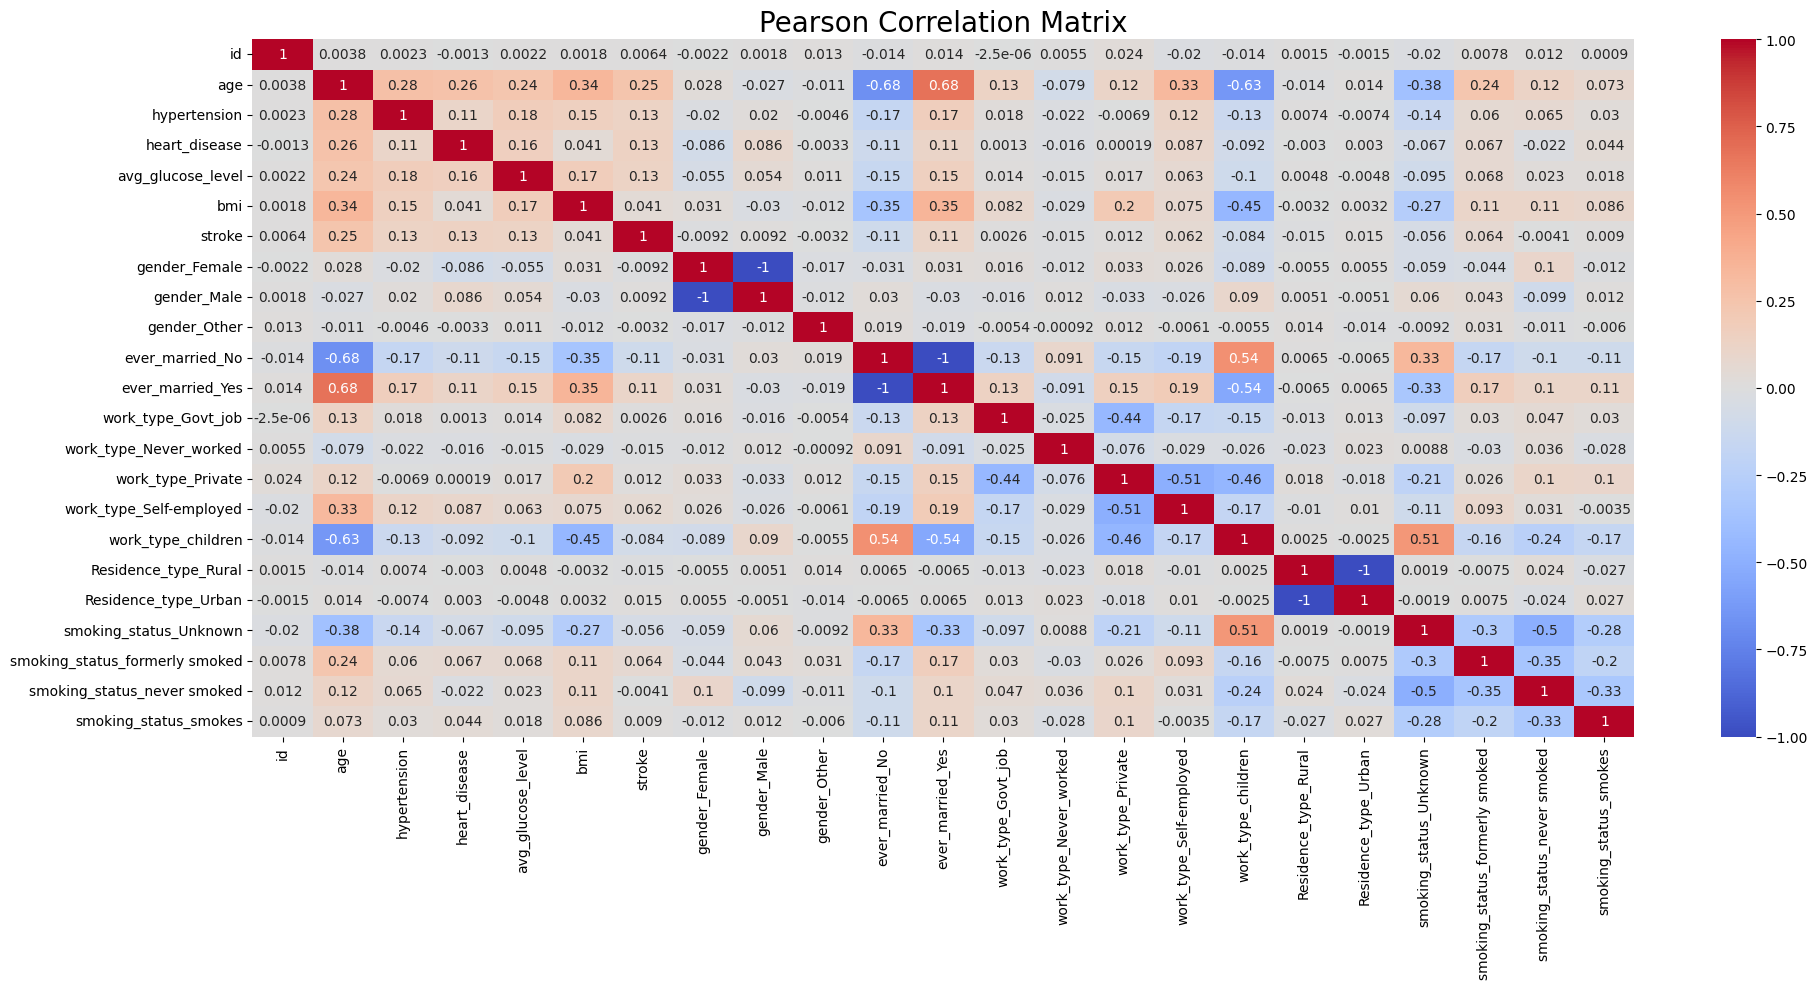

In [36]:
#plottibg pearson correlation heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix', fontsize=20)
plt.tight_layout()
plt.show()

In [37]:
#Implementation ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 10000,criterion ='entropy', max_features = 4)

# Training the model
extra_tree_forest.fit(x, y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
feature_importance

array([1.55602916e-01, 2.39656582e-01, 3.41417966e-02, 2.98058438e-02,
       1.68463284e-01, 1.44765977e-01, 1.77731263e-02, 1.76802422e-02,
       1.18333009e-06, 1.52371080e-02, 1.53129282e-02, 1.38192089e-02,
       1.32107415e-04, 1.80775342e-02, 1.64815354e-02, 5.99336890e-03,
       1.97586155e-02, 1.96727885e-02, 1.50209506e-02, 1.64278825e-02,
       1.98660283e-02, 1.63089920e-02])

In [38]:
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_ ], axis=0)
feature_importance_normalized

array([1.65637207e-02, 3.03720135e-02, 1.01677306e-02, 8.13750889e-03,
       1.85981587e-02, 1.54596085e-02, 7.58286955e-03, 7.49145474e-03,
       9.17679645e-06, 1.32315805e-02, 1.32642958e-02, 5.60804797e-03,
       2.67108821e-04, 7.52275303e-03, 6.79742692e-03, 8.90292841e-03,
       7.93013518e-03, 7.82065057e-03, 5.75920880e-03, 6.85708012e-03,
       7.97795335e-03, 6.10239422e-03])

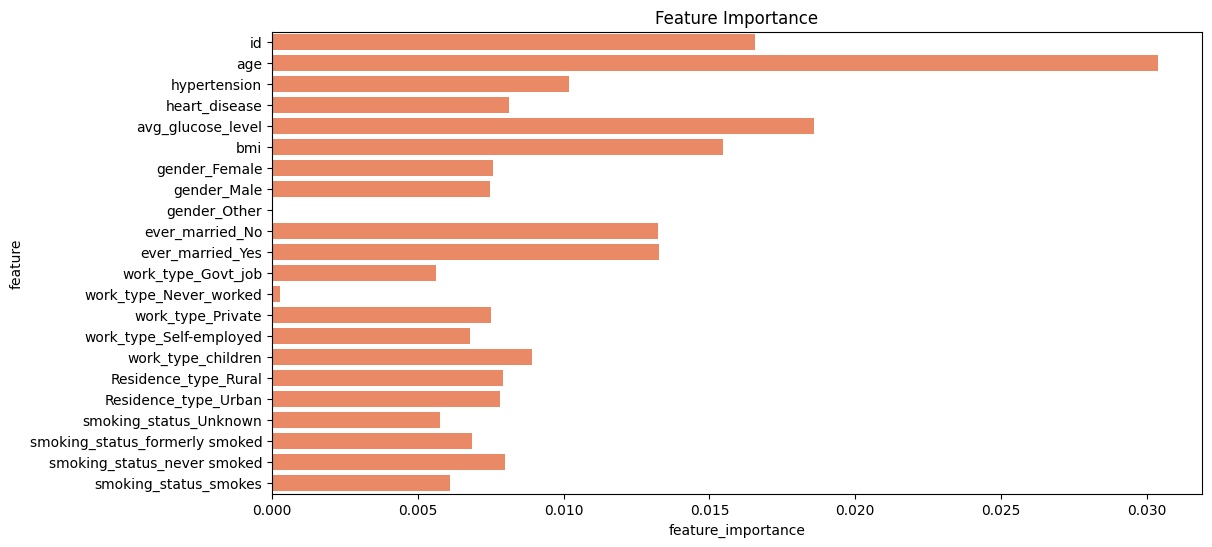

In [39]:
# Plotting a Bar Graph to compare the model
feature_data = pd.DataFrame({'feature_importance':feature_importance_normalized, 'feature':x.columns})

plt.figure(figsize=(12,6))
sns.barplot(x='feature_importance', y='feature', data=feature_data, color='coral')
plt.title('Feature Importance')
plt.show()

In [40]:
print(feature_data.sort_values(by='feature_importance', ascending=False))

    feature_importance                         feature
1             0.030372                             age
4             0.018598               avg_glucose_level
0             0.016564                              id
5             0.015460                             bmi
10            0.013264                ever_married_Yes
9             0.013232                 ever_married_No
2             0.010168                    hypertension
15            0.008903              work_type_children
3             0.008138                   heart_disease
20            0.007978     smoking_status_never smoked
16            0.007930            Residence_type_Rural
17            0.007821            Residence_type_Urban
6             0.007583                   gender_Female
13            0.007523               work_type_Private
7             0.007491                     gender_Male
19            0.006857  smoking_status_formerly smoked
14            0.006797         work_type_Self-employed
21        

In [41]:
# Dropping less important features
df.drop(columns=['id','gender_Other', 'work_type_Never_worked', 'work_type_Govt_job', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'work_type_Self-employed', 'work_type_Private'],inplace=True)

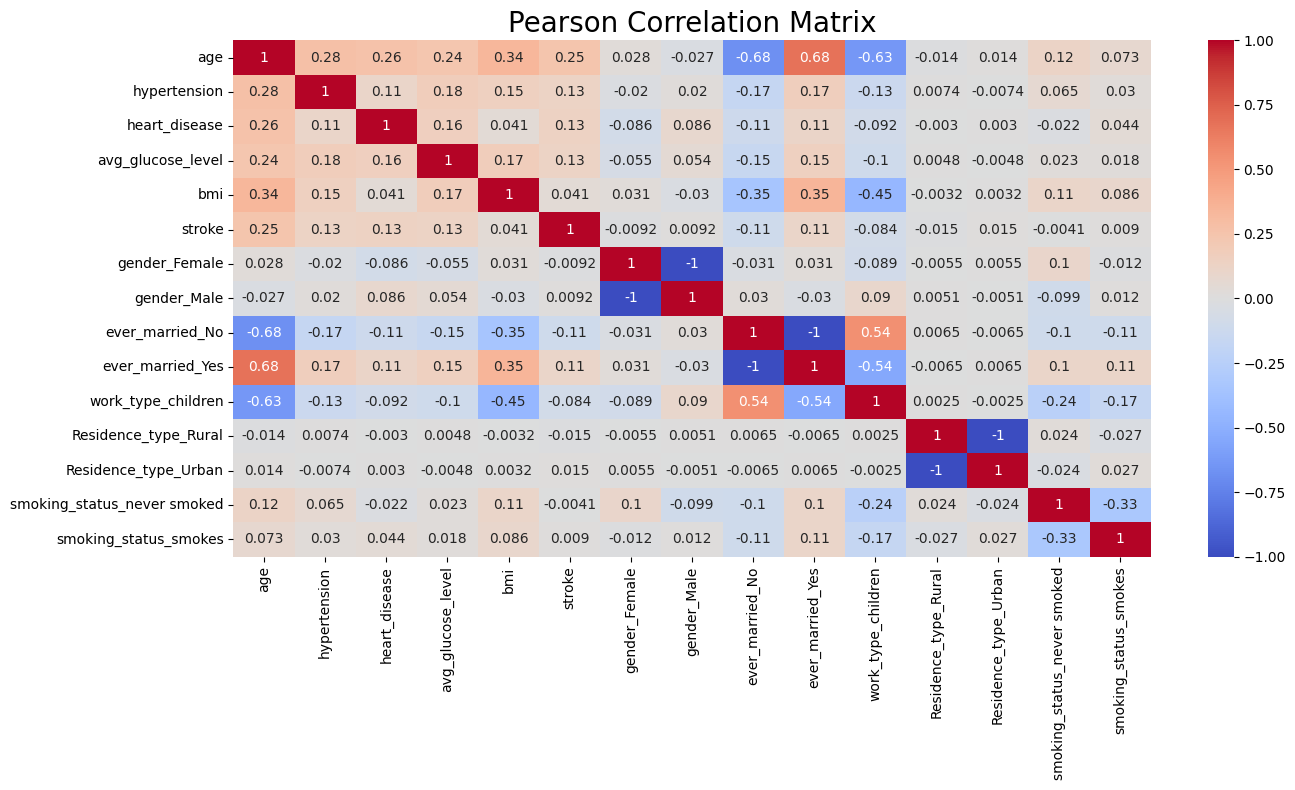

In [42]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix', fontsize=20)
plt.tight_layout()
plt.show()


'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Female', 'gender_Male', 'ever_married_No',
       'ever_married_Yes', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_never smoked',
       'smoking_status_smokes'

These are important features from the above Observation.

###  Data Splitting

In [43]:
# Split your data to train and test. Choose Splitting ratio wisely.

#contains all independent variables
X = df.drop(['stroke'], axis=1)

#contains dependent variable
y = df['stroke']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [44]:
print(f"X train Shape: {X_train.shape}")
print(f"X test Shape: {X_test.shape}")
print(f"y train Shape: {y_train.shape}")
print(f"y test Shape: {y_test.shape}")

X train Shape: (4084, 14)
X test Shape: (1022, 14)
y train Shape: (4084,)
y test Shape: (1022,)


###Handling Imbalanced Dataset

   stroke  count
0       0   4857
1       1    249


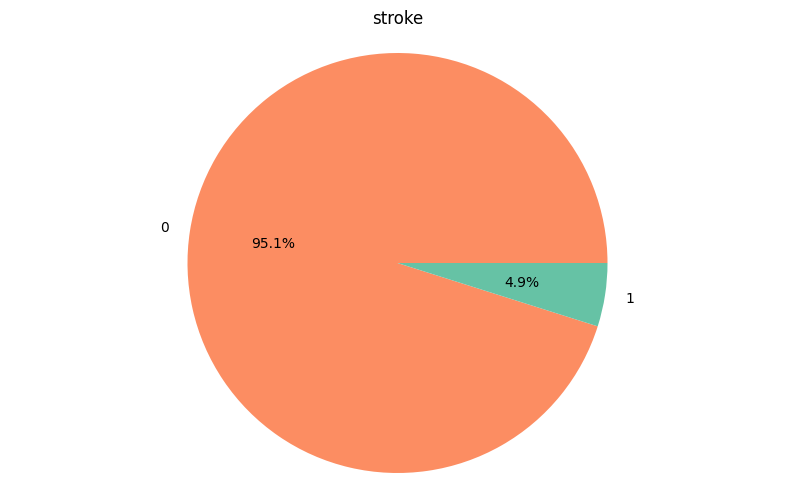

In [45]:
responses = df['stroke'].value_counts().reset_index()
print(responses)

# Distribution of dependent variable using pie
plt.figure(figsize=(10, 6))
plt.pie(responses['count'], labels=responses['stroke'], autopct='%1.1f%%', colors=sns.color_palette('Set2')[1::-1])
plt.title('stroke')
plt.axis('equal')
plt.show()


The dataset is highly imbalanced.

In [46]:
# to handle the imbalanced data i'll use smote(Synthetic Minority Oversampling Technique)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

The dataset is balanced with smote oversampling technique, its one of the popular technique to handle imbalaced datasets and the dataset can be used for training.

### Data Scaling

In [47]:
# Scaling your data
# using Standardscaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## ML Model Implementation

### ML Model - 1 Implementing Logistic Regression

In [48]:
# ML Model - 1 Implementation
model = LogisticRegression(max_iter=10000)

# Fit the Algorithm
model.fit(X_train, y_train)

# Predict on the model class
train_pred_log = model.predict(X_train)
test_pred_log = model.predict(X_test)

In [49]:
# calculating different metrics
#calculating metrics for training
print("For training")
print(classification_report(y_train, train_pred_log))

roc_auc_score_train = roc_auc_score(y_train, train_pred_log)
print(f"Train ROC AUC Score: {roc_auc_score_train}")

print("-"*100)

#calculating metrics for testing
print("For testing")
print(classification_report(y_test, test_pred_log))

roc_auc_score_test = roc_auc_score(y_test, test_pred_log)
print(f"Test ROC AUC Score: {roc_auc_score_test}")

For training
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3885
           1       0.93      0.86      0.89      3885

    accuracy                           0.90      7770
   macro avg       0.90      0.90      0.90      7770
weighted avg       0.90      0.90      0.90      7770

Train ROC AUC Score: 0.8974259974259975
----------------------------------------------------------------------------------------------------
For testing
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.18      0.24      0.21        50

    accuracy                           0.91      1022
   macro avg       0.57      0.59      0.58      1022
weighted avg       0.92      0.91      0.92      1022

Test ROC AUC Score: 0.5922222222222222


#### 2. Cross- Validation & Hyperparameter Tuning

In [50]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# commentincg this code as it takes so much time but will be using the best parameters given by this gridsearch model
'''model = LogisticRegression(max_iter=10000)

# Define the parameter grid
param_grid = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
'penalty' : ['l1','l2'],
'C' : [ 0.1, 0.01,0.001]}


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))'''
# Predict on the model

# Get the predicted classes
best_params_log = {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
grid_result = LogisticRegression(**best_params_log)
grid_result.fit(X_train, y_train)
grid_train_log_preds = grid_result.predict(X_train)
grid_test_log_preds = grid_result.predict(X_test)


In [51]:
# calculating different metrics
#calculating metrics for training
print("For training")
print(classification_report(y_train, grid_train_log_preds))

roc_auc_score_train = roc_auc_score(y_train, grid_train_log_preds)
print(f"Train ROC AUC Score: {roc_auc_score_train}")

print("-"*100)

#calculating metrics for testing
print("For testing")
# Use the test set predictions instead of training set predictions
print(classification_report(y_test, grid_test_log_preds))

roc_auc_score_test = roc_auc_score(y_test, grid_test_log_preds)
print(f"Test ROC AUC Score: {roc_auc_score_test}")

For training
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3885
           1       0.93      0.86      0.89      3885

    accuracy                           0.90      7770
   macro avg       0.90      0.90      0.90      7770
weighted avg       0.90      0.90      0.90      7770

Train ROC AUC Score: 0.898069498069498
----------------------------------------------------------------------------------------------------
For testing
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       972
           1       0.18      0.24      0.21        50

    accuracy                           0.91      1022
   macro avg       0.57      0.59      0.58      1022
weighted avg       0.92      0.91      0.92      1022

Test ROC AUC Score: 0.5927366255144033


### ML Model - 2

In [52]:
# ML Model - 2 Implementation
# Create an instance of the XGBClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_preds_xg = xg_models.predict(X_train)
test_preds_xg = xg_models.predict(X_test)

In [53]:
# calculating different metrics
#calculating metrics for training
print("For training")
print(classification_report(y_train, train_preds_xg))

roc_auc_score_train = roc_auc_score(y_train, train_preds_xg)
print(f"Train ROC AUC Score: {roc_auc_score_train}")

print("-"*100)

#calculating metrics for testing
print("For testing")
print(classification_report(y_test, test_preds_xg))

roc_auc_score_test = roc_auc_score(y_test, test_preds_xg)
print(f"Test ROC AUC Score: {roc_auc_score_test}")

For training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3885
           1       1.00      1.00      1.00      3885

    accuracy                           1.00      7770
   macro avg       1.00      1.00      1.00      7770
weighted avg       1.00      1.00      1.00      7770

Train ROC AUC Score: 0.9974259974259974
----------------------------------------------------------------------------------------------------
For testing
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       972
           1       0.24      0.16      0.19        50

    accuracy                           0.93      1022
   macro avg       0.60      0.57      0.58      1022
weighted avg       0.92      0.93      0.93      1022

Test ROC AUC Score: 0.5671399176954732


#### 2. Cross- Validation & Hyperparameter Tuning

In [54]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the parameter grid

#commenting this code because this code requires so mucch time to run insted we are directly using the best parameters
'''param_grid = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'reg_lambda': [1, 1.5, 2],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}
# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='f1', cv=5, verbose=1, n_jobs=-1)

# Fit the Algorithm
grid_search.fit(X_train, y_train)

# Predict on the model
train_preds = grid_search.predict(X_train)
test_preds = grid_search.predict(X_test)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)'''

#these are the best parameters
#Best Parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'reg_lambda': 1, 'subsample': 0.9}
#Best Score: 0.9563650001016984

#we will use these hyper-parameters in XGBClassifier
best_params_xg = {'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'reg_lambda': 2, 'subsample': 0.8}
xg_model = XGBClassifier(**best_params_xg)

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_preds_xg_gr = xg_models.predict(X_train)
test_preds_xg_gr = xg_models.predict(X_test)

In [55]:
# calculating different metrics
#calculating metrics for training
print("For training")
print(classification_report(y_train, train_preds_xg_gr))

roc_auc_score_train = roc_auc_score(y_train, train_preds_xg_gr)
print(f"Train ROC AUC Score: {roc_auc_score_train}")

print("-"*100)

#calculating metrics for testing
print("For testing")
print(classification_report(y_test, test_preds_xg_gr))

roc_auc_score_test = roc_auc_score(y_test, test_preds_xg_gr)
print(f"Test ROC AUC Score: {roc_auc_score_test}")

For training
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3885
           1       0.97      0.95      0.96      3885

    accuracy                           0.96      7770
   macro avg       0.96      0.96      0.96      7770
weighted avg       0.96      0.96      0.96      7770

Train ROC AUC Score: 0.9634491634491635
----------------------------------------------------------------------------------------------------
For testing
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.16      0.16      0.16        50

    accuracy                           0.92      1022
   macro avg       0.56      0.56      0.56      1022
weighted avg       0.92      0.92      0.92      1022

Test ROC AUC Score: 0.5578806584362139


### ML Model - 3

In [56]:
# ML Model - 3 Implementation
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the Algorithm
rf_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_preds_rf = rf_model.predict(X_train)
test_preds_rf = rf_model.predict(X_test)

In [57]:
# calculating different metrics
#calculating metrics for training
print("For training")
print(classification_report(y_train, train_preds_rf))

roc_auc_score_train = roc_auc_score(y_train, train_preds_rf)
print(f"Train ROC AUC Score: {roc_auc_score_train}")

print("-"*100)

#calculating metrics for testing
print("For testing")
print(classification_report(y_test, test_preds_rf))

roc_auc_score_test = roc_auc_score(y_test, test_preds_rf)
print(f"Test ROC AUC Score: {roc_auc_score_test}")

For training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3885
           1       1.00      1.00      1.00      3885

    accuracy                           1.00      7770
   macro avg       1.00      1.00      1.00      7770
weighted avg       1.00      1.00      1.00      7770

Train ROC AUC Score: 1.0
----------------------------------------------------------------------------------------------------
For testing
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       972
           1       0.27      0.12      0.17        50

    accuracy                           0.94      1022
   macro avg       0.61      0.55      0.57      1022
weighted avg       0.92      0.94      0.93      1022

Test ROC AUC Score: 0.551769547325103


#### 2. Cross- Validation & Hyperparameter Tuning

In [58]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# commenting this code as takes too much time to execute but we will use the best parameters estimated from this process


'''# HYperparameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_grid,
                       cv = 5, verbose=2, scoring='f1')



# Fit the Algorithm
rf_grid.fit(X_train,y_train)

# Predict on the model
train_preds_rf_gs = rf_grid.predict(X_train)
test_preds_rf_gs = rf_grid.predict(X_test)

print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))'''

# using best params predicted by gridsearch
best_params_rf = {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300}

rf_grid = RandomForestClassifier(**best_params_rf, random_state=42)

# Fit the Algorithm
rf_grid.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_preds_rf_gs = rf_grid.predict(X_train)
test_preds_rf_gs = rf_grid.predict(X_test)

In [59]:
# calculating different metrics
#calculating metrics for training
print("For training")
print(classification_report(y_train, train_preds_rf_gs))

roc_auc_score_train = roc_auc_score(y_train, train_preds_rf_gs)
print(f"Train ROC AUC Score: {roc_auc_score_train}")

print("-"*100)

#calculating metrics for testing
print("For testing")
print(classification_report(y_test, test_preds_rf_gs))

roc_auc_score_test = roc_auc_score(y_test, test_preds_rf_gs)
print(f"Test ROC AUC Score: {roc_auc_score_test}")

For training
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3885
           1       0.96      0.96      0.96      3885

    accuracy                           0.96      7770
   macro avg       0.96      0.96      0.96      7770
weighted avg       0.96      0.96      0.96      7770

Train ROC AUC Score: 0.9594594594594594
----------------------------------------------------------------------------------------------------
For testing
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       972
           1       0.17      0.20      0.19        50

    accuracy                           0.91      1022
   macro avg       0.57      0.58      0.57      1022
weighted avg       0.92      0.91      0.92      1022

Test ROC AUC Score: 0.5753086419753086


In [60]:
#Using LogisticRegression and changing the threshold value to maximise the recall

best_params_log = {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
grid_result = LogisticRegression(**best_params_log)
grid_result.fit(X_train, y_train)
train_log_prob_preds = grid_result.predict_proba(X_train)
test_log_prob_preds = grid_result.predict_proba(X_test)

#changing the threshold value
log_train_preds = np.where(train_log_prob_preds[:, 1] > 0.05, 1, 0)
log_test_preds = np.where(test_log_prob_preds[:, 1] > 0.05, 1, 0)

In [61]:
# calculating different metrics
#calculating metrics for training
print("For training")
print(classification_report(y_train, log_train_preds))

roc_auc_score_train = roc_auc_score(y_train, log_train_preds)
print(f"Train ROC AUC Score: {roc_auc_score_train}")

print("-"*100)

#calculating metrics for testing
print("For testing")
print(classification_report(y_test, log_test_preds))

roc_auc_score_test = roc_auc_score(y_test, log_test_preds)
print(f"Test ROC AUC Score: {roc_auc_score_test}")

For training
              precision    recall  f1-score   support

           0       0.99      0.43      0.60      3885
           1       0.64      1.00      0.78      3885

    accuracy                           0.71      7770
   macro avg       0.81      0.71      0.69      7770
weighted avg       0.81      0.71      0.69      7770

Train ROC AUC Score: 0.7128700128700128
----------------------------------------------------------------------------------------------------
For testing
              precision    recall  f1-score   support

           0       0.99      0.45      0.62       972
           1       0.08      0.94      0.15        50

    accuracy                           0.47      1022
   macro avg       0.54      0.70      0.38      1022
weighted avg       0.95      0.47      0.60      1022

Test ROC AUC Score: 0.6953086419753086


For the final model, we chose Logistic Regression with a controlled threshold. Despite other models potentially having higher accuracy scores, our priority in this medical-related project is to maximize recall. Maximizing recall is crucial in medical applications to ensure that as many positive cases as possible are identified, thereby minimizing the risk of missing true positive instances. Also because of highly imbalance nature the Accuracy Score don't explains much.

The plots for each model and their corresponding metrics are provided below:

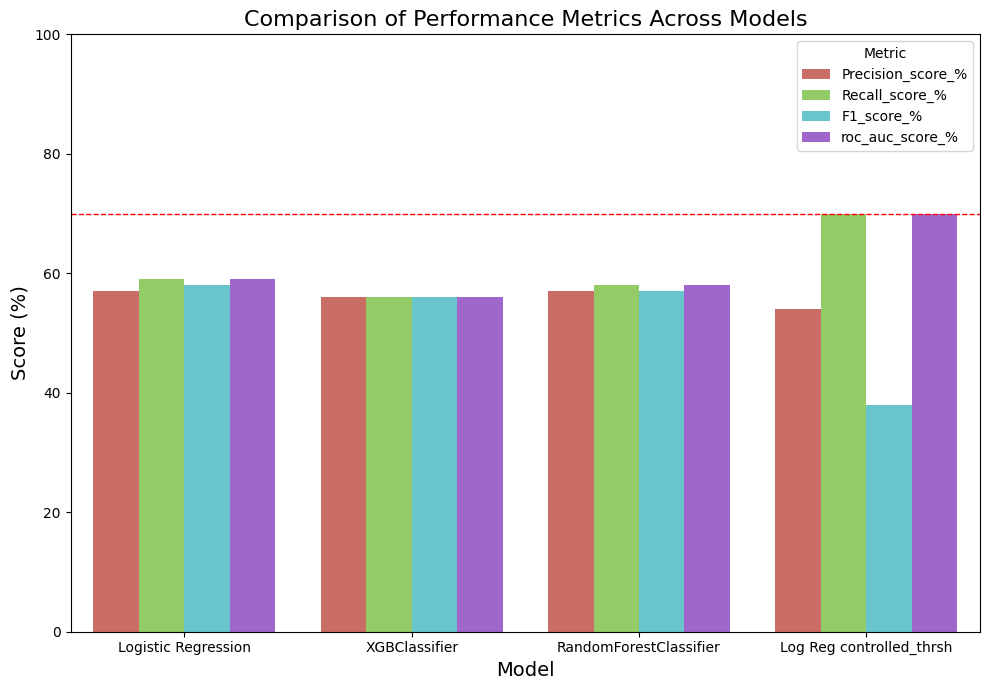

In [62]:
metrics_df = pd.DataFrame({'Model':['Logistic Regression','XGBClassifier','RandomForestClassifier','Log Reg controlled_thrsh'],
                           'Precision_score_%':[57, 56, 57, 54],
                           'Recall_score_%':[59, 56, 58, 70],
                           'F1_score_%':[58, 56, 57, 38],
                           'roc_auc_score_%':[59, 56, 58, 70]})

# Melt the DataFrame to long format for seaborn
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Create a color palette
palette = sns.color_palette("hls", len(metrics_melted['Metric'].unique()))

# Create the bar plot
plt.figure(figsize=(10, 7))
ax=sns.barplot(data=metrics_melted, x='Model', y='Score', hue='Metric', palette=palette)

# Add a horizontal line at the threshold value
threshold = 70
ax.axhline(threshold, color='red', linewidth=1, linestyle='--')

# Add titles and labels
plt.title('Comparison of Performance Metrics Across Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score (%)', fontsize=14)
plt.legend(title='Metric', fontsize=10)
plt.ylim(0, 100)

# Show the plot
plt.tight_layout()
plt.show()

### Showing Top 5 Important Features

In [67]:

def feature_plot(importances):

    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for Top Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.2, align="center", color = '#95d5b2', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.2, np.cumsum(values), width = 0.2, align = "center", color = '#c77dff', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)

    plt.legend(loc = 'upper left')
    plt.tight_layout()
    plt.show()

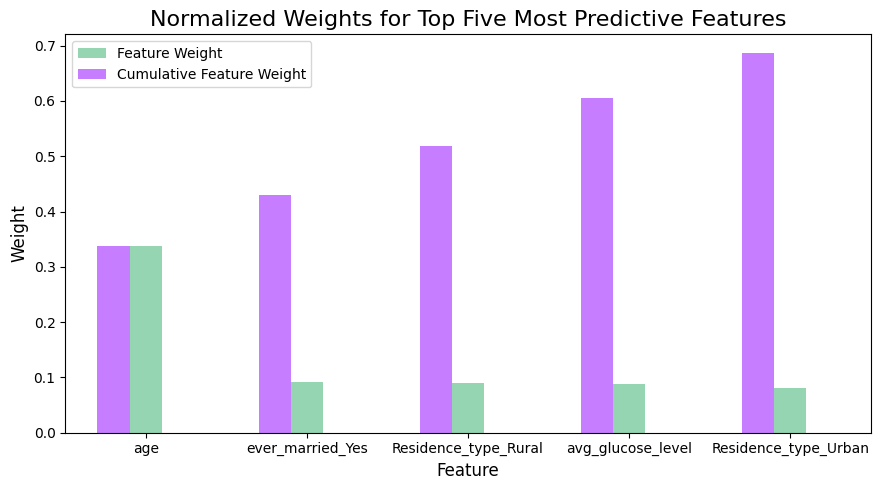

In [68]:
def show_feature_importance():
    model = RandomForestClassifier(**best_params_rf, random_state=42)
    model.fit(X_train,y_train)

    importances = np.mean([
        tree.feature_importances_ for tree in model.estimators_
        ], axis=0)
    feature_plot(importances)


show_feature_importance()

# **Conclusion**


###**Project Conclusion:**

In this project, we developed a machine learning classification model to predict the likelihood of stroke in patients based on key health parameters. The model was trained and validated on a dataset containing relevant patient information, achieving promising recall. The results indicate that the model can effectively identify individuals at high risk of stroke, providing a valuable tool for healthcare professionals to implement preventive measures and improve patient outcomes. This predictive capability can contribute to reducing the global burden of stroke, aligning with the WHO's goal of mitigating the impact of this life-threatening condition.

